Step 2 Part one

In [69]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sn
sn.set(style='whitegrid')

Load Training Data

In [70]:
training_data = pd.read_csv("housing_train_clean.csv")
training_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1,0,0,0,0,0,...,0,1,8,856,1,0,0,2003,2003,2008
1,1262,0,0,3,1,0,0,0,0,0,...,0,1,6,1262,1,0,298,1976,1976,2007
2,920,866,0,3,1,0,0,0,0,0,...,0,1,6,920,1,0,0,2001,2002,2008
3,961,756,0,3,1,0,0,0,0,0,...,0,1,7,756,1,0,0,1915,1970,2006
4,1145,1053,0,4,1,0,0,0,0,0,...,0,1,9,1145,1,0,192,2000,2000,2008


In [71]:
X_train = training_data.drop('SalePrice', axis = 1)
Y_train = training_data['SalePrice']

In [72]:
X_train

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1,0,0,0,0,0,...,0,1,8,856,1,0,0,2003,2003,2008
1,1262,0,0,3,1,0,0,0,0,0,...,0,1,6,1262,1,0,298,1976,1976,2007
2,920,866,0,3,1,0,0,0,0,0,...,0,1,6,920,1,0,0,2001,2002,2008
3,961,756,0,3,1,0,0,0,0,0,...,0,1,7,756,1,0,0,1915,1970,2006
4,1145,1053,0,4,1,0,0,0,0,0,...,0,1,9,1145,1,0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,3,1,0,0,0,0,0,...,0,1,7,953,1,0,0,1999,2000,2007
1456,2073,0,0,3,1,0,0,0,0,0,...,0,1,7,1542,1,0,349,1978,1988,2010
1457,1188,1152,0,4,1,0,0,0,0,0,...,0,1,9,1152,1,0,0,1941,2006,2010
1458,1078,0,0,2,1,0,0,0,0,0,...,0,1,5,1078,1,0,366,1950,1996,2010


Load Test Data

In [73]:
testing_data = pd.read_csv("housing_test_clean.csv")
testing_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,2,1,0,0,0,0,0,...,0,1,5,882.0,1,0,140,1961,1961,2010
1,1329,0,0,3,1,0,0,0,0,0,...,0,1,6,1329.0,1,0,393,1958,1958,2010
2,928,701,0,3,1,0,0,0,0,0,...,0,1,6,928.0,1,0,212,1997,1998,2010
3,926,678,0,3,1,0,0,0,0,0,...,0,1,7,926.0,1,0,360,1998,1998,2010
4,1280,0,0,2,0,0,0,0,1,0,...,0,1,5,1280.0,1,0,0,1992,1992,2010


In [74]:
X_test = testing_data.drop('SalePrice', axis = 1)
Y_test = testing_data['SalePrice']

In [75]:
X_test

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,2,1,0,0,0,0,0,...,0,1,5,882.0,1,0,140,1961,1961,2010
1,1329,0,0,3,1,0,0,0,0,0,...,0,1,6,1329.0,1,0,393,1958,1958,2010
2,928,701,0,3,1,0,0,0,0,0,...,0,1,6,928.0,1,0,212,1997,1998,2010
3,926,678,0,3,1,0,0,0,0,0,...,0,1,7,926.0,1,0,360,1998,1998,2010
4,1280,0,0,2,0,0,0,0,1,0,...,0,1,5,1280.0,1,0,0,1992,1992,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,3,0,0,0,1,0,0,...,0,1,5,546.0,1,0,0,1970,1970,2006
1455,546,546,0,3,0,0,0,0,1,0,...,0,1,6,546.0,1,0,0,1970,1970,2006
1456,1224,0,0,4,1,0,0,0,0,0,...,0,1,7,1224.0,1,0,474,1960,1996,2006
1457,970,0,0,3,1,0,0,0,0,0,...,0,1,6,912.0,1,0,80,1992,1992,2006


Convert Pandas datatype to numpy array

In [76]:
X_train = X_train.values
Y_train = Y_train.values.reshape(-1)
X_test = X_test.values
Y_test = Y_test.values.reshape(-1)

In [77]:
X_train

array([[ 856.,  854.,    0., ..., 2003., 2003., 2008.],
       [1262.,    0.,    0., ..., 1976., 1976., 2007.],
       [ 920.,  866.,    0., ..., 2001., 2002., 2008.],
       ...,
       [1188., 1152.,    0., ..., 1941., 2006., 2010.],
       [1078.,    0.,    0., ..., 1950., 1996., 2010.],
       [1256.,    0.,    0., ..., 1965., 1965., 2008.]])

In [78]:
X_train.shape

(1460, 275)

In [79]:
Y_train

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [80]:
Y_train.shape

(1460,)

Normalize X_train and X_test using MinMax Scaler

In [81]:
scaler=MinMaxScaler()
#get the parameters of the transform
scaler.fit(X_train)
#normalize the features in the training set
X_train_s = scaler.transform(X_train)
#normalize the features in the test set
X_test_s = scaler.transform(X_test)

Using KNeighborsRegressor

In [82]:
from sklearn.neighbors import KNeighborsRegressor

In [83]:
 
knn = KNeighborsRegressor(n_neighbors = 8)
# train the KNN regressor
knn.fit(X_train_s, Y_train)
# test the KNN regressor
Y_test_pred_knn = knn.predict(X_test_s)
# Calculate errors on test set
MSE1 = np.mean((Y_test - Y_test_pred_knn)**2)
MAE1 = np.mean(np.abs(Y_test - Y_test_pred_knn))
MAPE1 =  np.mean(np.abs(Y_test - Y_test_pred_knn)/Y_test)
print('MSE=', MSE1)
print('MAE=', MAE1)
print('MAPE=', MAPE1)

MSE= 1384185343.1143298
MAE= 22711.51583832559
MAPE= 0.12705921312853313


In [84]:
Y_test.max()

1108100.021121912

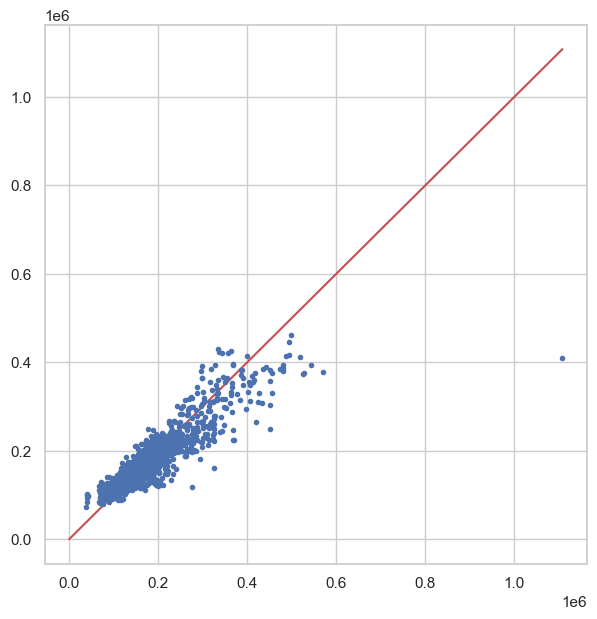

In [85]:
fig, ax = plt.subplots()
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
ax.plot(x_45_degree_line, x_45_degree_line, '-r')
ax.plot(Y_test, Y_test_pred_knn, '.b')

Using Linear Regression To Predict House Value

In [86]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(fit_intercept=True)

In [87]:
# train the regressor
linear_model.fit(X_train_s, Y_train)

LinearRegression()

In [88]:
# test the regressor
Y_test_pred_lin = linear_model.predict(X_test_s)
# Calculate errors
MSE2 = np.mean((Y_test - Y_test_pred_lin)**2)
MAE2 = np.mean(np.abs(Y_test - Y_test_pred_lin))
MAPE2 =  np.mean(np.abs(Y_test - Y_test_pred_lin)/Y_test)
print('MSE=', MSE2)
print('MAE=', MAE2)
print('MAPE=', MAPE2)

MSE= 2.6039386201649123e+28
MAE= 15102589627132.47
MAPE= 106302969.00688899


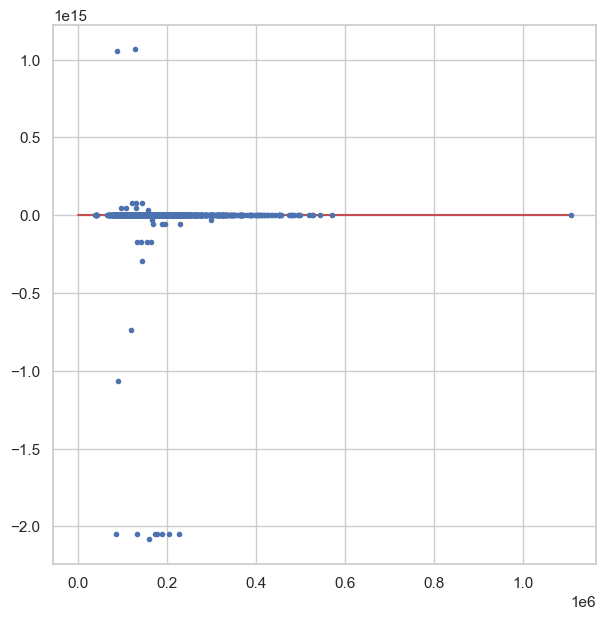

In [89]:
plt.rcParams['figure.figsize'] = (7,7)
fig, ax = plt.subplots()
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
ax.plot(x_45_degree_line, x_45_degree_line, '-r')
ax.plot(Y_test, Y_test_pred_lin, '.b')

DecisionTreeRegressor

In [90]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=10)

In [91]:
dtree.fit(X_train_s, Y_train)

DecisionTreeRegressor(max_depth=10)

In [92]:
# test the regressor
Y_test_pred_dt = dtree.predict(X_test_s)
# Calculate errors
MSE3 = np.mean((Y_test - Y_test_pred_dt)**2)
MAE3 = np.mean(np.abs(Y_test - Y_test_pred_dt))
MAPE3 =  np.mean(np.abs(Y_test - Y_test_pred_dt)/Y_test)
print('MSE=', MSE3)
print('MAE=', MAE3)
print('MAPE=', MAPE3)

MSE= 1281985999.5019813
MAE= 20676.742728414494
MAPE= 0.11414467988358795


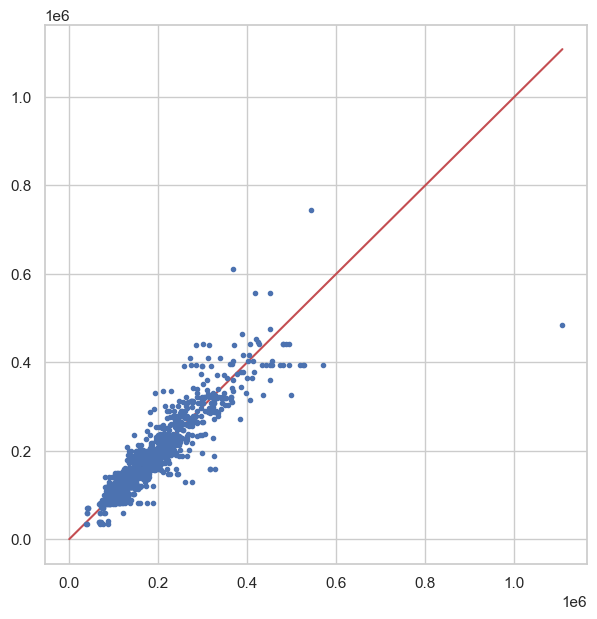

In [93]:
plt.rcParams['figure.figsize'] = (7,7)
fig, ax = plt.subplots()
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
ax.plot(x_45_degree_line, x_45_degree_line, '-r')
ax.plot(Y_test, Y_test_pred_dt, '.b')

RandomForestRegressor

In [104]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=100, max_samples=0.8, max_depth=100, random_state=0)
RF.fit(X_train_s, Y_train)

RandomForestRegressor(max_depth=100, max_samples=0.8, random_state=0)

In [114]:
Y_test_pred_rf = RF.predict(X_test_s)

In [115]:
RF.score(X_train_s, Y_train)

0.9705003363829133

In [116]:
RF.score(X_test_s, Y_test)

0.9198393632439397

In [117]:
# Calculate errors
MSE4 = np.mean((Y_test - Y_test_pred_rf)**2)
MAE4 = np.mean(np.abs(Y_test - Y_test_pred_rf))
MAPE4 =  np.mean(np.abs(Y_test - Y_test_pred_rf)/Y_test)
print('MSE=', MSE4)
print('MAE=', MAE4)
print('MAPE=', MAPE4)

MSE= 524328251.98807126
MAE= 10638.880020726536
MAPE= 0.06046567912574789


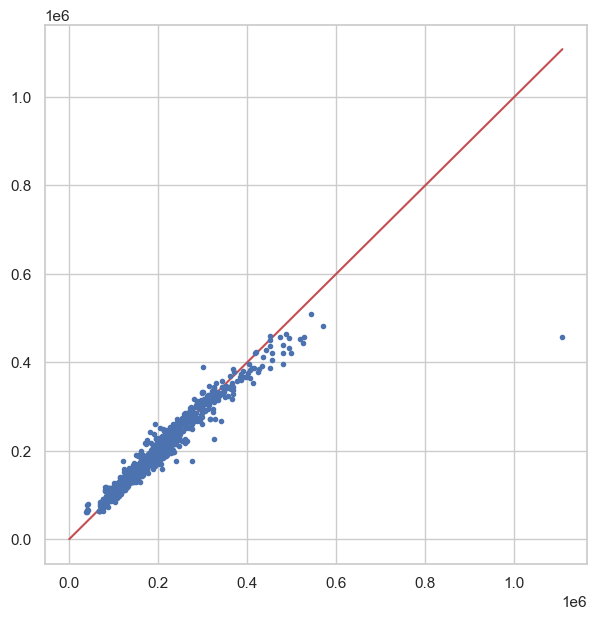

In [118]:
plt.rcParams['figure.figsize'] = (7,7)
fig, ax = plt.subplots()
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
ax.plot(x_45_degree_line, x_45_degree_line, '-r')
ax.plot(Y_test, Y_test_pred_rf, '.b')

Dataframe of observed values 

In [119]:
dict = {'':["MSE", "MAE", "MAPE"],
        'KNN': [MSE1, MAE1, MAPE1],
        'Linear Regression':[MSE2, MAE2, MAPE2],
        'Decision Tree':[MSE3, MAE3, MAPE3],
        'Random Forest':[MSE4, MAE4, MAPE4]}

results = pd.DataFrame(dict)
results

,,KNN,Linear Regression,Decision Tree,Random Forest
0,MSE,1.384185e+09,6.025827e+29,1.220863e+09,5.243283e+08
1,MAE,2.271152e+04,8.235398e+13,2.015183e+04,1.063888e+04
2,MAPE,1.270592e-01,5.509034e+08,1.112715e-01,6.046568e-02
